## 1. Изучим общую информацию и подготовим данные

Импортируем библиотеки и посмотрим на данные

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from scipy import stats as st

In [6]:
df = pd.read_csv('/datasets/games.csv')

In [7]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Сначала для удобства сделаем названия столбцов в нижнем регистре

In [10]:
df.columns =['name', 'platform', 'release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
             'user_score', 'raiting']

Теперь необходимо обработать пропуски и заменить типы данных.

Начнём с даты релизов. Пропусков в столбце довольно мало, поэтому их можно удалить. Пропуски возможно связаны с программной ошибкой. Также благодаря удалению пропусков мы сможем заменить тип данных в столбце

In [11]:
df = df.dropna(subset = ['release'])

In [12]:
df['release'] = df['release'].astype('int')

'Пустые' оценки критиков заменим средним значением данного столбца. Пропуски образовались скорее всего из-за того, что у некоторых игр нет оценок, либо из-за ошибки. 

In [13]:
critic_mean = df['critic_score'].mean()

In [14]:
df['critic_score'] = df['critic_score'].fillna(critic_mean)

Для того, чтобы заменить пропуски в столбце с пользовательскими оценками, нам необходимо заменить тип данных с object на float. Но программа выдаст ошибку т.к. у  нас присутствует текст в столбце. Нужно его найти

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - это сокрее всего аббревиатура, которая означает, что пользователь не определился с оценкой. Для того, чтобы заменить пропуски на среднее значение столбца, заменим аббревиатуру на NaN и после этого мы сможем сменить тип данных

In [16]:
df.loc[df['user_score']== 'tbd', 'user_score'] = 'NaN'

In [17]:
df['user_score'] = df['user_score'].astype('float')

In [18]:
user_mean = df['user_score'].mean()

In [19]:
df['user_score'] = df['user_score'].fillna(user_mean)

Пропуски в столбце с возрастным рейтингом вызваны возможно тем, что этим видеоиграм банально не давались рейтинги. Поэтому заменим пропуски строкой 'not_defined'

In [20]:
df['raiting'] = df['raiting'].fillna('not_defined')

По два пропуска в столбцах name и genre не будем трогать, на дальнейший анализ они никак не повлияют

In [21]:
df.isna().sum()

name            2
platform        0
release         0
genre           2
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
raiting         0
dtype: int64

Теперь найдём и добавим в таблицу общую сумму по продажам

In [22]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [23]:
df

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,not_defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,not_defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,not_defined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.994363,7.12633,not_defined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,not_defined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.994363,7.12633,not_defined,0.01


### Вывод

Обработали пропуски, заменили типы данных, поменяли названия столбцов и добавили сумму продаж по всем регионам. Теперь можно приступать к анализу.

## 2. Проведём исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы

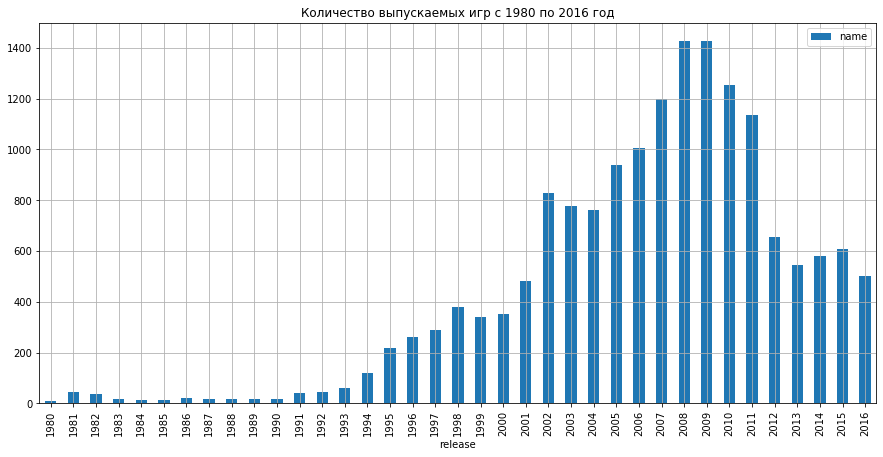

In [24]:
(df.pivot_table(index = 'release', values = 'name', aggfunc = 'count')
 .plot(kind = 'bar', grid = True, figsize = (15,7), title = 'Количество выпускаемых игр с 1980 по 2016 год'))

По данному графику видно, что большое количество игр выпускалось с 2002 по 2016 год. По этой выборке и будем проводить наше исследование. Так как в задаче указано, что мы делаем отчёт в 2016 году, данных за этот год может не быть, либо они не полные, поэтому за последний год возьмём 2015

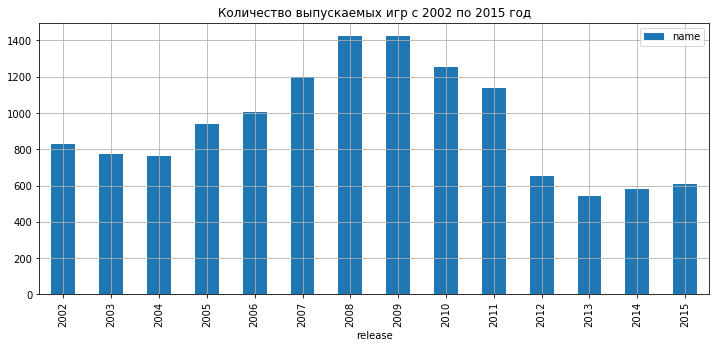

In [25]:
(df.query('release >= 2002 and release <= 2015').pivot_table(index = 'release', values = 'name', aggfunc = 'count')
 .plot(kind = 'bar', grid = True, figsize = (12,5), title = 'Количество выпускаемых игр с 2002 по 2015 год'))

Теперь посмотрим, какие платформы мы возьмём за основу для анализа. Посмотрим на топовые суммарные продажи 15 платформ

In [26]:
(df.query('release >= 2002 and release <= 2015').groupby(['platform'])[['sum_sales']].agg('sum')
 .sort_values(by = 'sum_sales', ascending = False).head(15))

,sum_sales
platform,
PS2,1027.96
X360,959.72
PS3,927.74
Wii,891.00
DS,802.76
PSP,289.53
GBA,251.28
PS4,244.89
3DS,242.67


Выделим только те, количество которых больше 100 миллионов

In [27]:
(df.query('release >= 2002 and release <= 2015').groupby(['platform'])[['sum_sales']].agg('sum')
 .sort_values(by = 'sum_sales', ascending = False).query('sum_sales >= 100'))

,sum_sales
platform,
PS2,1027.96
X360,959.72
PS3,927.74
Wii,891.00
DS,802.76
PSP,289.53
GBA,251.28
PS4,244.89
3DS,242.67


Их мы и возьмём за основу для будущих расчётов. Теперь посмотрим на распределения по годам и выделим перспективные платформы

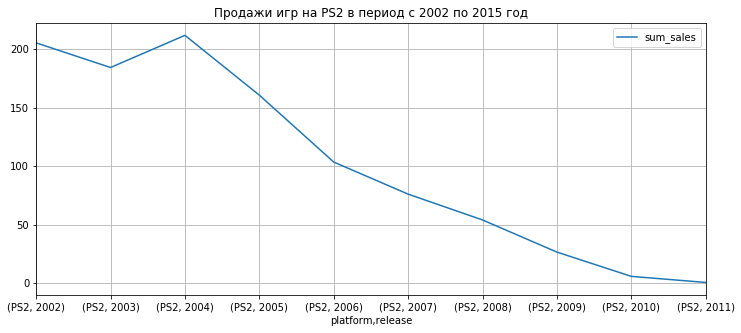

In [28]:
(df.query('platform == "PS2" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на PS2 в период с 2002 по 2015 год'))

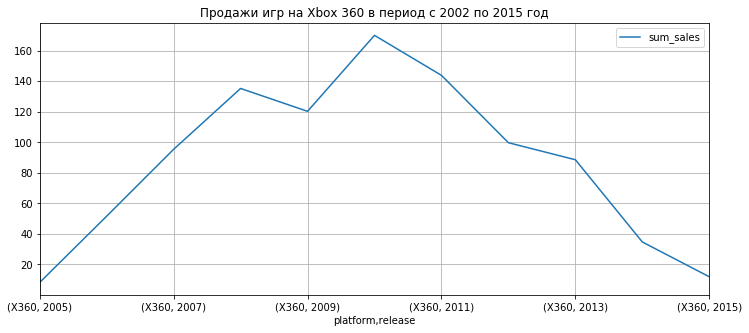

In [29]:
(df.query('platform == "X360" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на Xbox 360 в период с 2002 по 2015 год'))

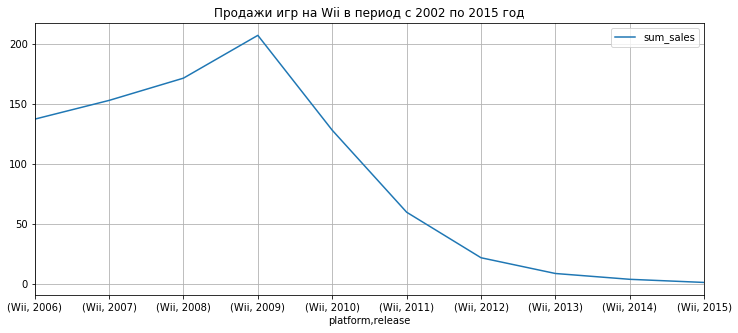

In [30]:
(df.query('platform == "Wii" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на Wii в период с 2002 по 2015 год'))

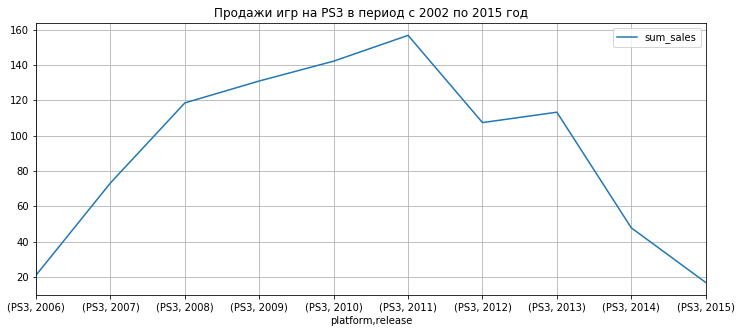

In [31]:
(df.query('platform == "PS3" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на PS3 в период с 2002 по 2015 год'))

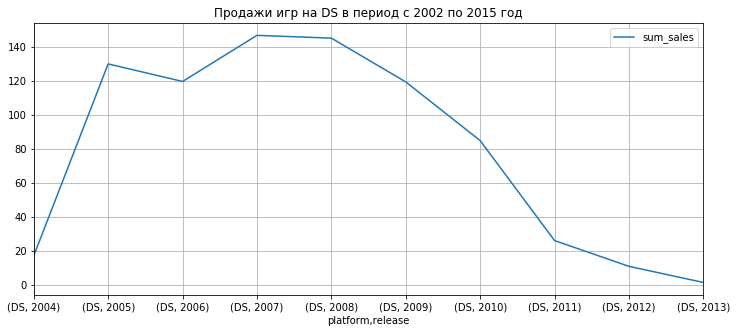

In [32]:
(df.query('platform == "DS" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum' )
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на DS в период с 2002 по 2015 год'))

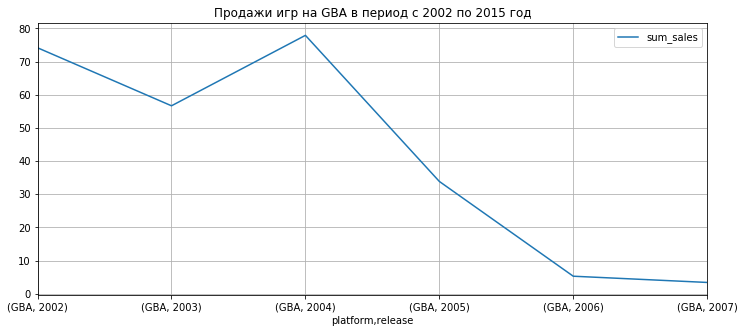

In [33]:
(df.query('platform == "GBA" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на GBA в период с 2002 по 2015 год'))

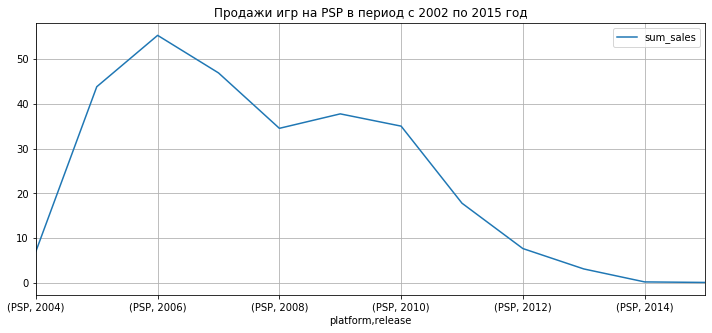

In [34]:
(df.query('platform == "PSP" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на PSP в период с 2002 по 2015 год'))

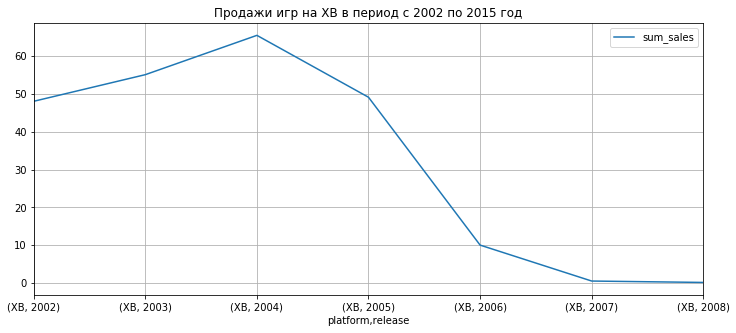

In [35]:
(df.query('platform == "XB" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на XB в период с 2002 по 2015 год'))

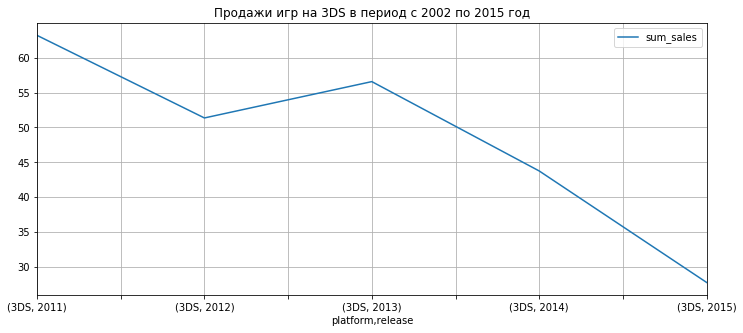

In [36]:
(df.query('platform == "3DS" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на 3DS в период с 2002 по 2015 год'))

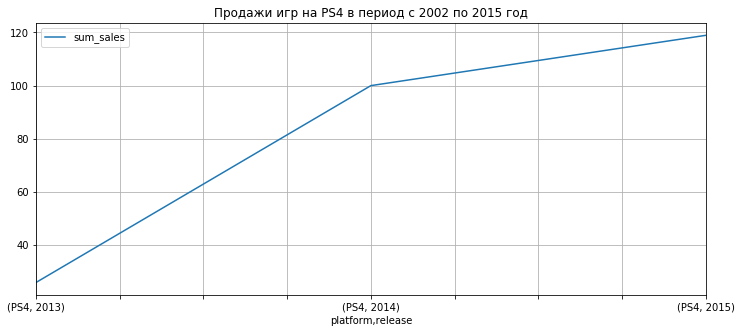

In [37]:
(df.query('platform == "PS4" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на PS4 в период с 2002 по 2015 год'))

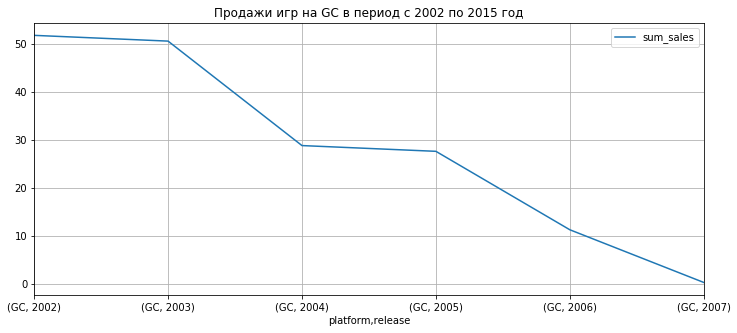

In [38]:
(df.query('platform == "GC" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на GC в период с 2002 по 2015 год'))

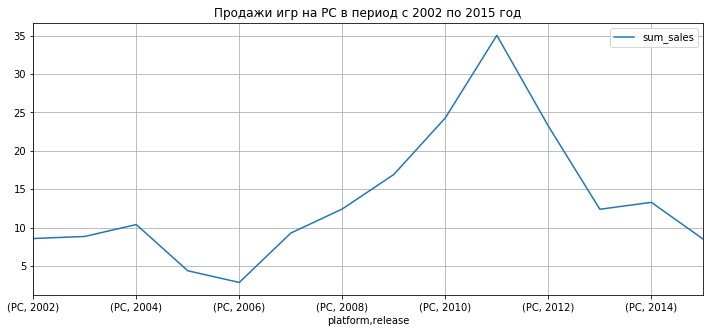

In [39]:
(df.query('platform == "PC" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на PC в период с 2002 по 2015 год'))

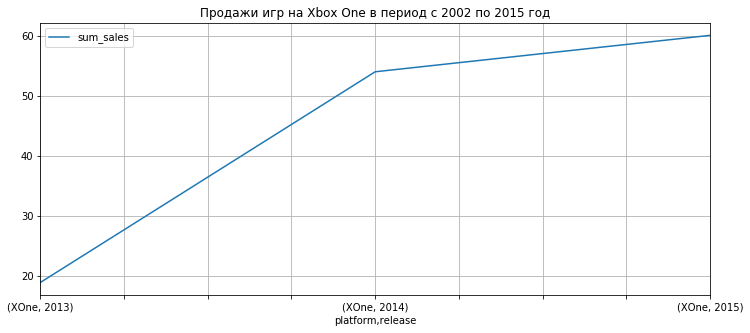

In [40]:
(df.query('platform == "XOne" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (12,5), title = 'Продажи игр на Xbox One в период с 2002 по 2015 год'))

Судя по распределениям можно отметить несколько особенностей:

- Практически все платформы первые несколько лет получают самую большую прибыль и затем идёт спад

- 'Продолжительность жизни' платформ находится в района от 6 до 10 лет

- Из всех платформ выделяются в основном две, это Xbox One и PS4. У них не падает прибыль т.к. этим платформам всего три года.

Из этого можно сделать вывод о том, что потенциально прибыльными платфорами являются Xbox One и PS4.

Построим график "ящик с усами" и посмотрим на среднее и медиану для топ 4 платформ

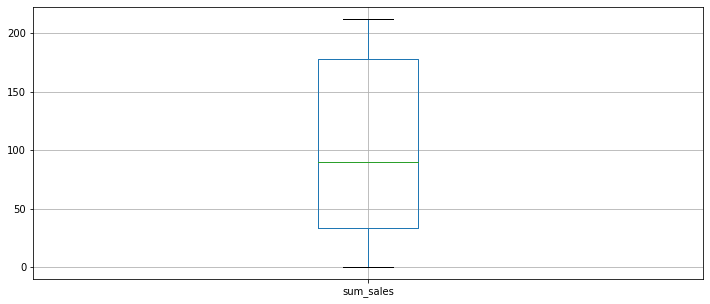

In [41]:
(df.query('platform == "PS2" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(kind = 'box', grid = True, figsize = (12,5)))

In [42]:
df['sum_sales'].loc[(df['platform']== 'PS2') & (df['release'] >= 2002) & (df['release'] <= 2015)].describe()

count    1860.000000
mean        0.552667
std         1.064984
min         0.000000
25%         0.080000
50%         0.230000
75%         0.540000
max        20.810000
Name: sum_sales, dtype: float64

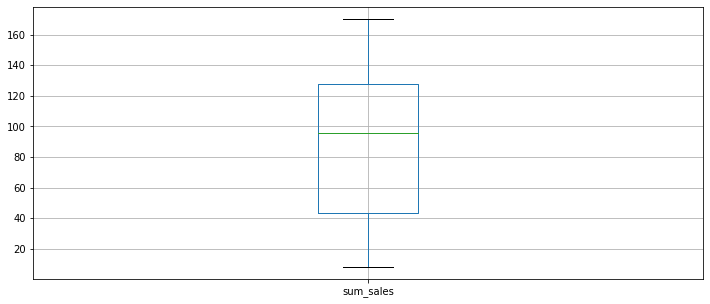

In [43]:
(df.query('platform == "X360" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(kind = 'box', grid = True, figsize = (12,5)))

In [44]:
df['sum_sales'].loc[(df['platform']== 'X360') & (df['release'] >= 2002) & (df['release'] <= 2015)].describe()

count    1219.000000
mean        0.787301
std         1.639323
min         0.010000
25%         0.120000
50%         0.280000
75%         0.780000
max        21.820000
Name: sum_sales, dtype: float64

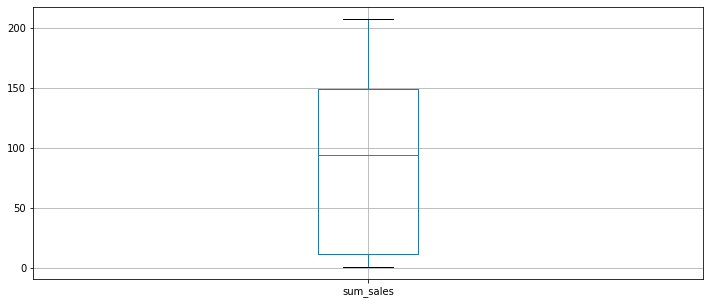

In [45]:
(df.query('platform == "Wii" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(kind = 'box', grid = True, figsize = (12,5),))

In [46]:
df['sum_sales'].loc[(df['platform']== 'Wii') & (df['release'] >= 2002) & (df['release'] <= 2015)].describe()

count    1285.000000
mean        0.693385
std         3.166221
min         0.010000
25%         0.090000
50%         0.190000
75%         0.490000
max        82.540000
Name: sum_sales, dtype: float64

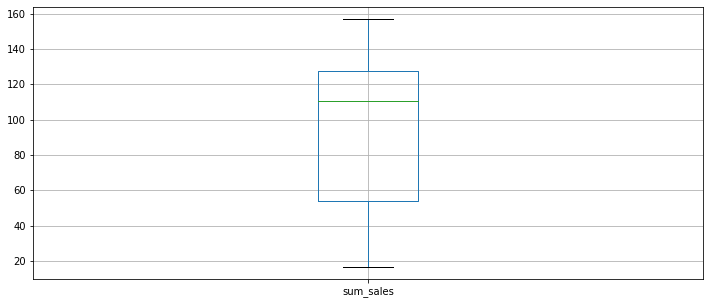

In [47]:
(df.query('platform == "PS3" and release >= 2002 and release <= 2015')
 .pivot_table(index = ['platform', 'release'], values = 'sum_sales', aggfunc = 'sum')
 .plot(kind = 'box', grid = True, figsize = (12,5)))

In [48]:
df['sum_sales'].loc[(df['platform']== 'PS3') & (df['release'] >= 2002) & (df['release'] <= 2015)].describe()

count    1268.000000
mean        0.731656
std         1.419646
min         0.000000
25%         0.110000
50%         0.290000
75%         0.790000
max        21.050000
Name: sum_sales, dtype: float64

По данным графикам видно, что средние значения выше медианы в 2-3 раза. Это связано с тем, что у одной отдельной игры могут быть продажи как у 100 игр

Посмотрим на влияние оценок от критиков и пользователей на продажи. За основу возьмём топ-3 платформы и посчитаем корреляцию

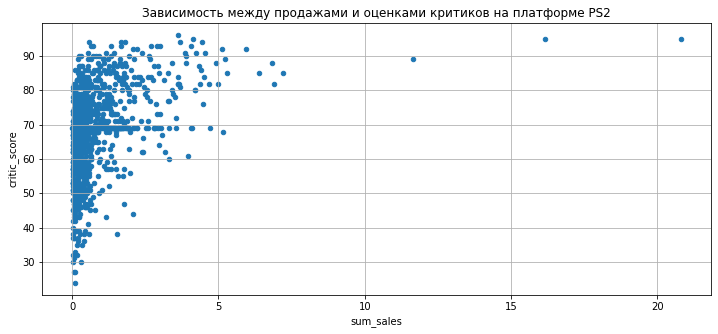

In [49]:
(df.query('platform == "PS2" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'critic_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками критиков на платформе PS2'))

In [50]:
(df['sum_sales'].loc[(df['platform']== 'PS2') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['critic_score'].loc[(df['platform'] == 'PS2') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.348046872695587

In [51]:
df['sum_sales'].loc[df['platform']== 'PS2'].corr(df['critic_score'].loc[df['platform']== "PS2"])

0.3645643727505088

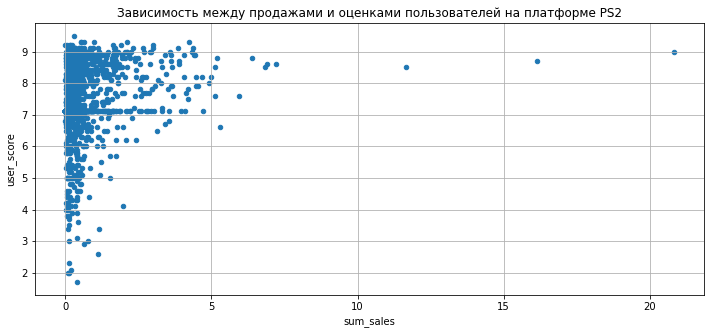

In [52]:
(df.query('platform == "PS2" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'user_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками пользователей на платформе PS2'))

In [53]:
(df['sum_sales'].loc[(df['platform']== 'PS2') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['user_score'].loc[(df['platform'] == 'PS2') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.20839951667789403

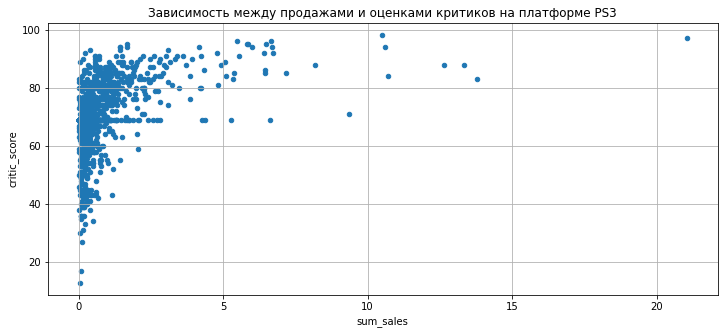

In [54]:
(df.query('platform == "PS3" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'critic_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками критиков на платформе PS3'))

In [55]:
(df['sum_sales'].loc[(df['platform']== 'PS3') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['critic_score'].loc[(df['platform'] == 'PS3') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.4196296153729392

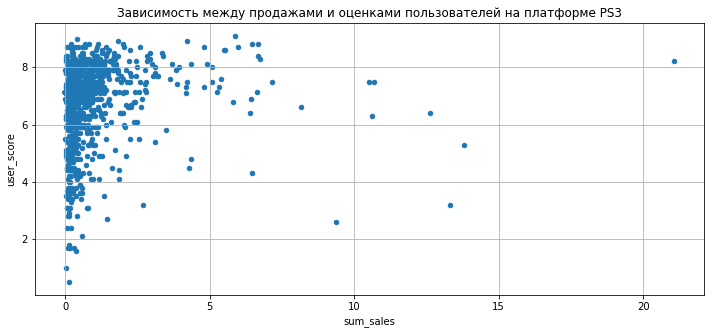

In [56]:
(df.query('platform == "PS3" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'user_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками пользователей на платформе PS3'))

In [57]:
(df['sum_sales'].loc[(df['platform']== 'PS3') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['user_score'].loc[(df['platform'] == 'PS3') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.07958655114789276

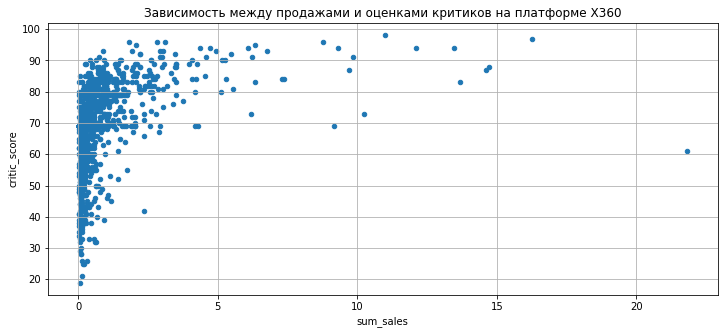

In [58]:
(df.query('platform == "X360" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'critic_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками критиков на платформе X360'))

In [59]:
(df['sum_sales'].loc[(df['platform']== 'X360') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['critic_score'].loc[(df['platform'] == 'X360') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.37476459804933937

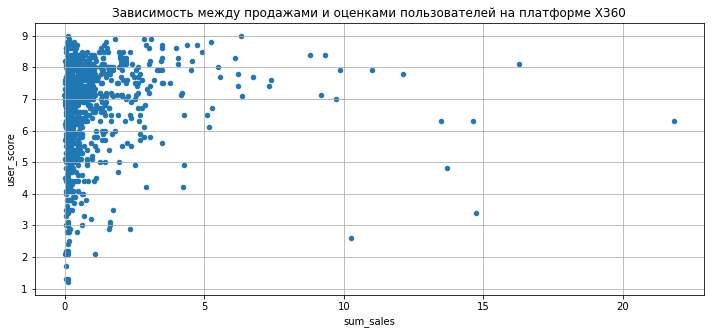

In [60]:
(df.query('platform == "X360" and release >= 2002 and release <= 2015')
 .plot(kind = 'scatter', x = 'sum_sales', y = 'user_score', grid = True, figsize = (12,5)
      , title = 'Зависимость между продажами и оценками пользователей на платформе X360'))

In [61]:
(df['sum_sales'].loc[(df['platform']== 'X360') & (df['release'] >= 2002) & (df['release'] <= 2015)]
 .corr(df['user_score'].loc[(df['platform'] == 'X360') & (df['release'] >= 2002) & (df['release'] <= 2015)]))

0.0808224885359775

По полученным данным можно с уверенностю говорить, что продажи от оценки критиков зависят больше, чем от оценки пользователей. Тем не менее, зависимость довольно маленькая, чтобы делать акцент на оценках критиков. Практически все игры находятся в районе от 0 до 5 миллионов.

Время поглядеть на распределение продаж по жанрам

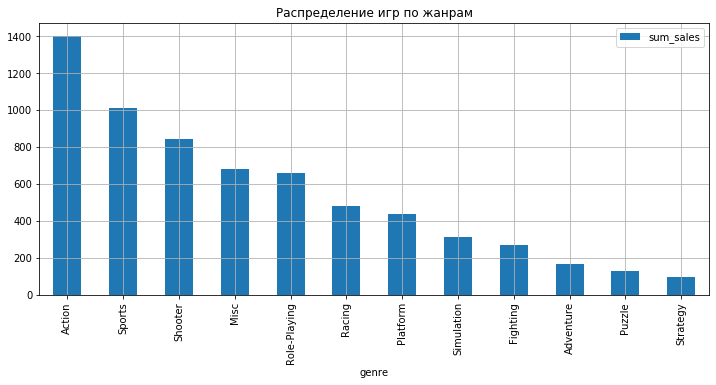

In [62]:
(df.query('release >= 2002 and release <= 2015').groupby('genre')[['sum_sales']].agg('sum')
 .sort_values(by = 'sum_sales', ascending = False)
 .plot(kind = 'bar', grid = True, figsize = (12,5), title = 'Распределение игр по жанрам'))

Больше всего продаж наблюдается у жанра Action. Стратегии, пазлы и приключения пользуются самым меньшим спросом

### Вывод

Выяснили, что потенциально прибыльно прибыльными платформами в будущем являются Xbox One и PS4. Среднее значение по платформам в игровой индустрии может быть в 2-3 раза больше. Самый популярным жанром является Action, а пользовательские оценки очень слабо влияют на продажи.

## 3. Составим портрет пользователя каждого региона

Определим топ-5 самых популярных платформ и посчитаем доли продаж в разных регионах

In [63]:
top_sales = (df.query('release >= 2002 and release <= 2015')
 .pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum'))

In [64]:
top_sales['sum'] = top_sales['eu_sales'] + top_sales['na_sales'] + top_sales['jp_sales']

In [65]:
top_sales.sort_values(by = 'sum', ascending = False).head(5)

,eu_sales,jp_sales,na_sales,sum
platform,,,,
X360,267.61,12.30,595.05,874.96
PS2,269.62,110.88,477.35,857.85
Wii,258.21,68.28,486.81,813.30
PS3,325.95,78.11,389.46,793.52
DS,188.41,175.00,380.31,743.72


In [66]:
top_sales['eu_%'] = (top_sales['eu_sales'] / top_sales['sum']) * 100

In [67]:
top_sales['jp_%'] = (top_sales['jp_sales'] / top_sales['sum']) * 100

In [68]:
top_sales['na_%'] = (top_sales['na_sales'] / top_sales['sum']) * 100

In [69]:
top_sales.sort_values(by = 'sum', ascending = False).head(5)

,eu_sales,jp_sales,na_sales,sum,eu_%,jp_%,na_%
platform,,,,,,,
X360,267.61,12.30,595.05,874.96,30.585398,1.405779,68.008823
PS2,269.62,110.88,477.35,857.85,31.429737,12.925337,55.644926
Wii,258.21,68.28,486.81,813.30,31.748432,8.395426,59.856142
PS3,325.95,78.11,389.46,793.52,41.076469,9.843482,49.080048
DS,188.41,175.00,380.31,743.72,25.333459,23.530361,51.136180


Больше всего игр на платформах покупают в Cеверной Америке, а в Японии популярной платформой является DS. В Европе же доминирует PS3

Теперь посмотрим на топ-5 самых популярных жанров

In [70]:
top_genre = (df.query('release >= 2002 and release <= 2015')
 .pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum'))

In [71]:
top_genre['sum'] = top_genre['eu_sales'] + top_genre['jp_sales'] + top_genre['na_sales']

In [72]:
top_genre.sort_values(by = 'sum', ascending = False).head(5)

,eu_sales,jp_sales,na_sales,sum
genre,,,,
Action,425.81,115.43,695.38,1236.62
Sports,303.66,64.70,530.30,898.66
Shooter,268.45,21.49,459.88,749.82
Misc,186.89,80.36,347.41,614.66
Role-Playing,143.06,209.75,261.75,614.56


Стоит отметить, что жанр Role-Playing популярней в Японии больше, чем в Европе, тогда как в той же Японии шутеры совсем почти не пользуются спросом, в отличии от Европы и Америки.

Посмотрим, влияет ли возрастной рейтинг на продажи в отдельном регионе

In [73]:
top_esrb = (df.query('release >= 2002 and release <= 2015')
.pivot_table(index = 'raiting', values = ['eu_sales', 'na_sales', 'jp_sales'], aggfunc = 'sum'))

In [74]:
top_esrb

,eu_sales,jp_sales,na_sales
raiting,,,
AO,0.61,0.00,1.26
E,616.56,174.31,1131.40
E10+,179.52,39.75,341.69
EC,0.11,0.00,1.53
M,439.61,52.24,683.32
RP,0.03,0.00,0.00
T,348.70,112.02,641.07
not_defined,301.59,335.56,415.93


Продажи с разными возрастными рейтингами по регионам определённо различаются. Игры с рейтингом Е продаются больше, чем с рейтингом M. Из топовых продаж, меньше всего продаж у игр с рейтингом Е10+

### Вывод

В Европе, пользователь обычно играет на PS3 в игры жанра Action с возрастным рейтингом E

В Японии играют на DS в игры жанра Role-Playing с неопределённым возрастным ограничением

В Северной Америке, геймеры чаще всего играют на Xbox 360 в игры жанра Action с возрастным рейтингом E

## 4. Проверим гипотезы

Первая гипотеза звучит так: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевой гипотезой будем считать то, что средние пользовательские рейтинги двух платформ различаются(исрпавил). За альфу возьмём 5%. Если значение будет меньше, то отвергнем нулевую гипотезу

В качестве критерия будем использовать тест на основе распределения Стьюдента - t-test. Для этого перед тестом проверим дисперсии выборок для определения атрибута equal_var

Так как Xbox one затрагивает всего три года, выделим такой же интервал и для PC

In [75]:
alpha = 0.05

In [76]:
np.var(df['user_score'].loc[(df['platform'] == 'XOne') & (df['release'] >= 2013) & (df['release'] <= 2015)], ddof = 1)

1.2847007873997764

In [77]:
np.var(df['user_score'].loc[(df['platform'] == 'PC') & (df['release'] >= 2013) & (df['release'] <= 2015)], ddof = 1)

2.6091074562760834

In [78]:
results = st.ttest_ind(df['user_score'].loc[(df['platform'] == 'XOne') & (df['release'] >= 2013) & (df['release'] <= 2015)], 
                       df['user_score'].loc[(df['platform'] == 'PC') & (df['release'] >= 2013) & (df['release'] <= 2015)],
                      equal_var = False)

In [79]:
results.pvalue

0.15314353441792358

Не получилось отвергнуть нулевую гипотезу

Вторая гипотеза звучит так: Средние пользовательские рейтинги жанров Action и Sports разные. Нулевой гипотезой будет то, что средний пользовательские рейтинги двух жанров равны. Альфу сделаем также 5%

In [80]:
np.var(df['user_score'].loc[(df['genre'] == 'Action') & (df['release'] >= 2002) & (df['release'] <= 2015)], ddof = 1)

1.1587596643383185

In [81]:
np.var(df['user_score'].loc[(df['genre'] == 'Sports') & (df['release'] >= 2002) & (df['release'] <= 2015)], ddof = 1)

1.4175766371625256

In [82]:
results_genre = st.ttest_ind(df['user_score'].loc[(df['genre'] == 'Action') & (df['release'] >= 2002) & (df['release'] <= 2015)], 
                       df['user_score'].loc[(df['genre'] == 'Sports') & (df['release'] >= 2002) & (df['release'] <= 2015)])

In [83]:
results_genre.pvalue

0.1130840707736383

Не получилось отвергнуть нулевую гипотезу

### Вывод

В первом случае не получилось отвергнуть нулевую гипотезу т.к. t-test показал, что шанс на равенство пользовательских рейтингов платформ Xbox One и PC равен 15%. Во втором случае у нас также не получилось отвергнуть нулевую гипотезу т.к. значение превысло альфу и было равно 11%.

### 5. Общий вывод

В ходе исследования мы узнали, что следующая успешная игра должна появится либо на Xbox One, либо на PS4. Также желательно, чтобы у неё были хорошие оценки от критиков и она была в жанре Action. Для данного жанра, желательно выпустить игру в Северной Америке и Европе с возрастным рейтингом E.

Также мы определили, что за наш взятый актуальный период, самой продаваемой платформой является PS2, не смотря на то, что она появилась гораздо раньше PS3 и Xbox360. Судя по тому, что у платформ средние продажи превышают медиану в 2-3 раза, говорит о том, что платформы в основном получают выручку за счёт крупных релизов.